# us Accident Analysis

#### Important Libraries

In [130]:
# Important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Data Import

In [39]:
# Specify the new file path
accident_file_path = r"C:\Users\Admin\OneDrive\Documents\GitHub\DS_5\PRODIGY_DS_05\US_Accidents_Dec21_updated-Short.csv"

# Load the new dataset
df_accident = pd.read_csv(accident_file_path)

# Check the first few rows of the new DataFrame
df_accident.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-275794,2,11/22/2021 17:18,11/22/2021 18:38,32.993813,-117.158299,32.993768,-117.158067,0.014,Incident on VIA AZUL near CAMINO DEL SUR Drive...,...,False,False,False,False,True,False,Night,Night,Day,Day
1,A-275795,2,11/24/2021 17:33,11/24/2021 20:14,30.212714,-97.830968,30.214361,-97.831406,0.117,Stationary traffic from Convict Hill Rd to Ban...,...,False,False,False,False,False,False,Night,Day,Day,Day
2,A-275796,2,4/2/2021 13:48,4/3/2021 7:45,38.887736,-77.005923,38.892018,-77.005885,0.296,Accident from Independence Ave SE (1st St SE) ...,...,False,True,False,False,True,False,Day,Day,Day,Day
3,A-275797,2,6/28/2021 18:34,6/28/2021 18:54,35.994750,-86.692319,35.996869,-86.689881,0.200,Stationary traffic on TN-253 from Edmondson Pi...,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-275798,2,3/26/2021 16:07,3/26/2021 17:22,34.193665,-79.767895,34.194598,-79.767959,0.065,Incident on S IRBY ST near HOUSE 276 Drive wit...,...,False,False,False,False,True,False,Day,Day,Day,Day


In [41]:
df_accident.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

| #   | Attribute              | Description                                                                                                                                          | Nullable |
|-----|------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------|----------|
| 1   | ID                     | This is a unique identifier of the accident record.                                                                                                 | No       |
| 2   | Severity               | Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic and 4 indicates a significant impact.   | No       |
| 3   | Start_Time             | Shows start time of the accident in local time zone.                                                                                                | No       |
| 4   | End_Time               | Shows end time of the accident in local time zone. End time here refers to when the impact on traffic flow was dismissed.                           | No       |
| 5   | Start_Lat              | Shows latitude in GPS coordinate of the start point.                                                                                                | No       |
| 6   | Start_Lng              | Shows longitude in GPS coordinate of the start point.                                                                                               | No       |
| 7   | End_Lat                | Shows latitude in GPS coordinate of the end point.                                                                                                  | Yes      |
| 8   | End_Lng                | Shows longitude in GPS coordinate of the end point.                                                                                                 | Yes      |
| 9   | Distance(mi)           | The length of the road extent affected by the accident.                                                                                             | No       |
| 10  | Description            | Shows natural language description of the accident.                                                                                                 | No       |
| 11  | Number                 | Shows the street number in address field.                                                                                                           | Yes      |
| 12  | Street                 | Shows the street name in address field.                                                                                                             | Yes      |
| 13  | Side                   | Shows the relative side of the street (Right/Left) in address field.                                                                                | Yes      |
| 14  | City                   | Shows the city in address field.                                                                                                                    | Yes      |
| 15  | County                 | Shows the county in address field.                                                                                                                  | Yes      |
| 16  | State                  | Shows the state in address field.                                                                                                                   | Yes      |
| 17  | Zipcode                | Shows the zipcode in address field.                                                                                                                 | Yes      |
| 18  | Country                | Shows the country in address field.                                                                                                                 | Yes      |
| 19  | Timezone               | Shows timezone based on the location of the accident (eastern, central, etc.).                                                                      | Yes      |
| 20  | Airport_Code           | Denotes an airport-based weather station which is the closest to the accident location.                                                             | Yes      |
| 21  | Weather_Timestamp      | Shows the time-stamp of weather observation record (in local time).                                                                                 | Yes      |
| 22  | Temperature(F)         | Shows the temperature (in Fahrenheit).                                                                                                              | Yes      |
| 23  | Wind_Chill(F)          | Shows the wind chill (in Fahrenheit).                                                                                                               | Yes      |
| 24  | Humidity(%)            | Shows the humidity (in percentage).                                                                                                                 | Yes      |
| 25  | Pressure(in)           | Shows the air pressure (in inches).                                                                                                                 | Yes      |
| 26  | Visibility(mi)         | Shows visibility (in miles).                                                                                                                        | Yes      |
| 27  | Wind_Direction         | Shows wind direction.                                                                                                                               | Yes      |
| 28  | Wind_Speed(mph)        | Shows wind speed (in miles per hour).                                                                                                               | Yes      |
| 29  | Precipitation(in)      | Shows precipitation amount in inches, if there is any.                                                                                              | Yes      |
| 30  | Weather_Condition      | Shows the weather condition (rain, snow, thunderstorm, fog, etc.).                                                                                  | Yes      |
| 31  | Amenity                | A POI annotation indicating the presence of an amenity in a nearby location.                                                                        | No       |
| 32  | Bump                   | A POI annotation indicating the presence of a speed bump or hump in a nearby location.                                                              | No       |
| 33  | Crossing               | A POI annotation indicating the presence of a crossing in a nearby location.                                                                        | No       |
| 34  | Give_Way               | A POI annotation indicating the presence of a give_way in a nearby location.                                                                        | No       |
| 35  | Junction               | A POI annotation indicating the presence of a junction in a nearby location.                                                                        | No       |
| 36  | No_Exit                | A POI annotation indicating the presence of a no_exit in a nearby location.                                                                         | No       |
| 37  | Railway                | A POI annotation indicating the presence of a railway in a nearby location.                                                                         | No       |
| 38  | Roundabout             | A POI annotation indicating the presence of a roundabout in a nearby location.                                                                      | No       |
| 39  | Station                | A POI annotation indicating the presence of a station in a nearby location.                                                                         | No       |
| 40  | Stop                   | A POI annotation indicating the presence of a stop in a nearby location.                                                                            | No       |
| 41  | Traffic_Calming        | A POI annotation indicating the presence of traffic_calming in a nearby location.                                                                   | No       |
| 42  | Traffic_Signal         | A POI annotation indicating the presence of a traffic_signal in a nearby location.                                                                  | No       |
| 43  | Turning_Loop           | A POI annotation indicating the presence of a turning_loop in a nearby location.                                                                    | No       |
| 44  | Sunrise_Sunset         | Shows the period of day (i.e., day or night) based on sunrise/sunset.                                                                               | Yes      |
| 45  | Civil_Twilight         | Shows the period of day (i.e., day or night) based on civil twilight.                                                                               | Yes      |
| 46  | Nautical_Twilight      | Shows the period of day (i.e., day or night) based on nautical twilight.                                                                            | Yes      |
| 47  | Astronomical_Twilight  | Shows the period of day (i.e., day or night) based on astronomical twilight.                                                                         | Yes      |


### GOALS
    Analyse the average resolution time for accidents.
    Idenitfy the states with the highest number of accidents. What about most accidents of high severity?
    Analyse impact of weather conditions on no of accidents.
    Determine the time of days with most frequent accidents.
    Visualize the year on year trend of no of accidents.


### Data Cleaning

### Checking info of the Dataset

In [42]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50837 entries, 0 to 50836
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     50837 non-null  object 
 1   Severity               50837 non-null  int64  
 2   Start_Time             50837 non-null  object 
 3   End_Time               50837 non-null  object 
 4   Start_Lat              50837 non-null  float64
 5   Start_Lng              50837 non-null  float64
 6   End_Lat                50837 non-null  float64
 7   End_Lng                50837 non-null  float64
 8   Distance(mi)           50837 non-null  float64
 9   Description            50837 non-null  object 
 10  Number                 23974 non-null  float64
 11  Street                 50837 non-null  object 
 12  Side                   50837 non-null  object 
 13  City                   50831 non-null  object 
 14  County                 50837 non-null  object 
 15  St

  ### Checking NULL/Missing values

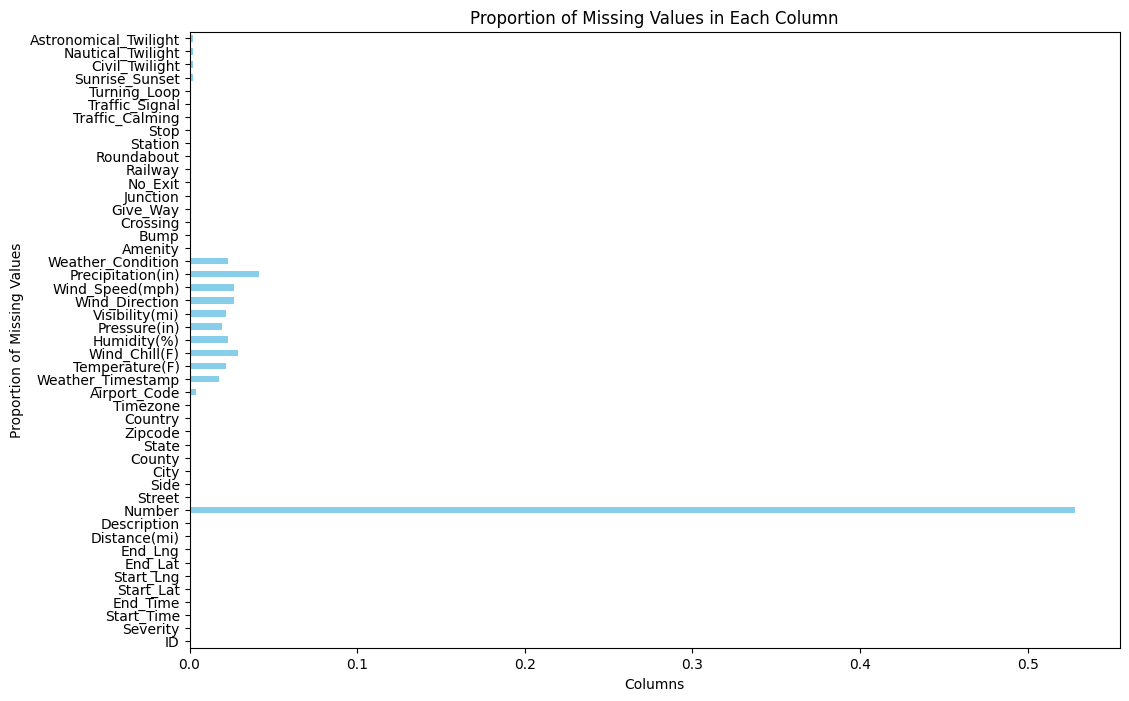

In [43]:
# Calculate the proportion of missing values
missing_values = df_accident.isna().sum() / len(df_accident)

# Plot the missing values
plt.figure(figsize=(12, 8))
missing_values.plot(kind='barh', color='skyblue')
plt.title('Proportion of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Proportion of Missing Values')
plt.show()

In [44]:
missing_values_sorted = missing_values.sort_values(ascending=False)
missing_values_sorted.head(20)

Number                   0.528414
Precipitation(in)        0.041643
Wind_Chill(F)            0.029034
Wind_Direction           0.026418
Wind_Speed(mph)          0.026398
Humidity(%)              0.022897
Weather_Condition        0.022680
Temperature(F)           0.022051
Visibility(mi)           0.021795
Pressure(in)             0.019435
Weather_Timestamp        0.017310
Airport_Code             0.003757
Nautical_Twilight        0.002301
Civil_Twilight           0.002301
Sunrise_Sunset           0.002301
Astronomical_Twilight    0.002301
Timezone                 0.000905
Zipcode                  0.000315
City                     0.000118
Give_Way                 0.000000
dtype: float64

- As we can see from the plot around half of the values in Number attribute are NULL.
  so we have to drop it. drop columns
- The other attributes has less number of values so will use dropna

### Dropping rows and columns

Dropping rows with NULL Values

In [45]:
#df_accident.drop(columns=["Number"],inplace=True)
df_accident.dropna()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-275794,2,11/22/2021 17:18,11/22/2021 18:38,32.993813,-117.158299,32.993768,-117.158067,0.014,Incident on VIA AZUL near CAMINO DEL SUR Drive...,...,False,False,False,False,True,False,Night,Night,Day,Day
2,A-275796,2,4/2/2021 13:48,4/3/2021 7:45,38.887736,-77.005923,38.892018,-77.005885,0.296,Accident from Independence Ave SE (1st St SE) ...,...,False,True,False,False,True,False,Day,Day,Day,Day
3,A-275797,2,6/28/2021 18:34,6/28/2021 18:54,35.994750,-86.692319,35.996869,-86.689881,0.200,Stationary traffic on TN-253 from Edmondson Pi...,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-275798,2,3/26/2021 16:07,3/26/2021 17:22,34.193665,-79.767895,34.194598,-79.767959,0.065,Incident on S IRBY ST near HOUSE 276 Drive wit...,...,False,False,False,False,True,False,Day,Day,Day,Day
9,A-275803,2,3/27/2021 15:47,3/27/2021 18:07,27.479021,-82.574499,27.480806,-82.574484,0.123,Incident on 13TH ST near 23RD AVE Drive with c...,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50828,A-326622,2,8/6/2021 12:47,8/6/2021 15:57,35.383458,-119.146971,35.383481,-119.145633,0.075,Accident on Heath Rd (Rosedale Hwy/CA-58) from...,...,False,False,False,False,False,False,Day,Day,Day,Day
50830,A-326624,2,5/3/2021 6:31,5/3/2021 17:43,25.656439,-80.412807,25.656176,-80.418775,0.372,Slow traffic from SW 127th Ave (SW 120th St) t...,...,False,False,False,False,False,False,Night,Day,Day,Day
50831,A-326625,2,3/1/2021 5:50,3/1/2021 19:15,25.656381,-80.414432,25.656176,-80.418775,0.271,Slow traffic from SW 127th Ave (SW 120th St) t...,...,False,False,False,False,False,False,Night,Night,Night,Day
50832,A-326626,2,10/27/2021 16:10,10/27/2021 18:11,25.770040,-80.313908,25.771471,-80.312124,0.149,Stationary traffic on FL-969 - FL-968 from Gra...,...,False,False,False,False,False,False,Day,Day,Day,Day


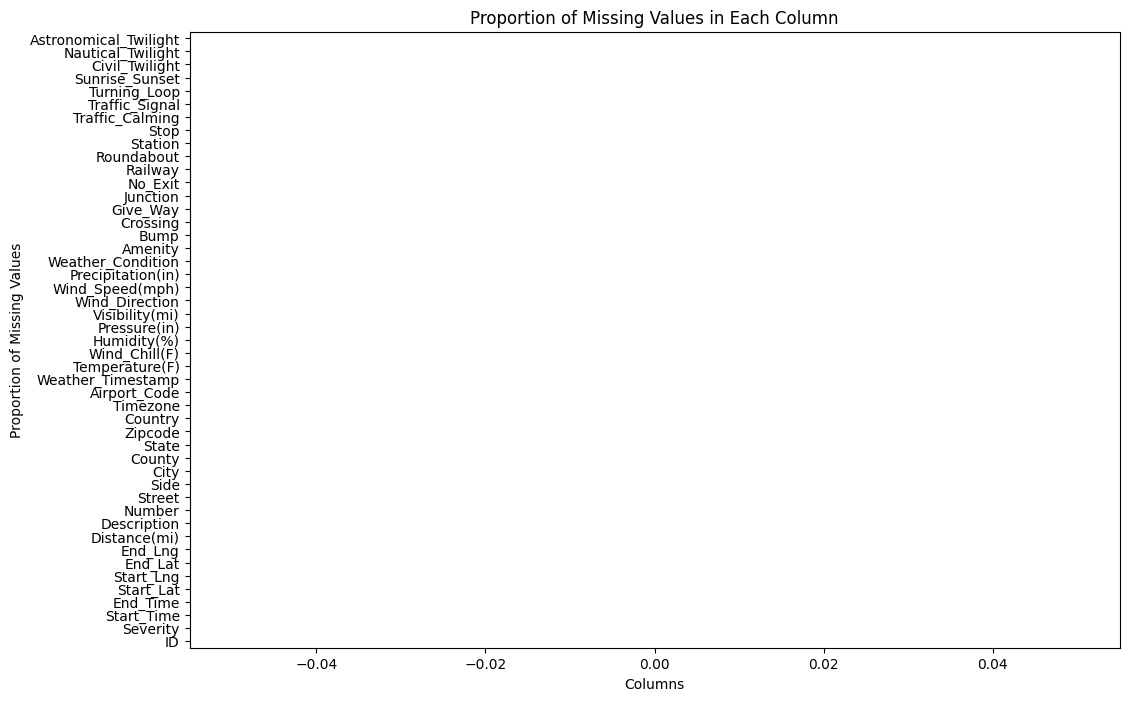

In [46]:
# Calculate the proportion of missing values
missing_values = df.isna().sum() / len(df)

# Plot the missing values
plt.figure(figsize=(12, 8))
missing_values.plot(kind='barh', color='skyblue')
plt.title('Proportion of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Proportion of Missing Values')
plt.show()

In [47]:
df.duplicated().sum()

0

- No Duplicated Values
- Now our data Ready for further Analysis

### Categorical Attributes: Cardinality

In [48]:
df_cat=df.select_dtypes('object')
col_name=[]
length=[]

for i in df_cat.columns:
    col_name.append(i)
    length.append(len(df_cat[i].unique()))
df_1=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_1

,feature,count_of_unique_values
0,ID,22736
1,Start_Time,18746
2,End_Time,19807
3,Description,19878
4,Street,11435
5,Side,2
6,City,3221
7,County,781
8,State,46
9,Zipcode,17121


#### Dropping Columns with High Cardinality Or "low-utility columns

In [ ]:
df_cat=df_cat.drop(columns=["ID","Source","Zipcode","Description","Airport_Code","Weather_Timestamp"])
df_cat.columns

Index(['Start_Time', 'End_Time', 'Street', 'Side', 'City', 'County', 'State',
       'Country', 'Timezone', 'Wind_Direction', 'Weather_Condition',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## Analysis

### Continuous Variables

In [31]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,22736.000000,22736.000000,22736.000000,22736.000000,22736.000000,22736.000000,22736.000000,22736.000000,22736.000000,22736.000000,22736.000000,22736.000000,22736.000000,22736.000000
mean,2.043367,34.443528,-93.546851,34.443806,-93.546643,0.291349,7350.246789,68.263327,67.762051,63.430815,29.457412,9.330636,7.089638,0.004311
std,0.291303,5.725721,17.240605,5.725911,17.240497,0.791831,14694.631574,16.374712,17.438301,21.904195,0.956295,2.432393,5.076106,0.037387
min,2.000000,24.669539,-124.497585,24.669646,-124.497421,0.000000,1.000000,-14.000000,-37.000000,1.000000,20.570000,0.000000,0.000000,0.000000
25%,2.000000,29.672723,-116.986303,29.674044,-116.986111,0.064000,1280.000000,58.000000,58.000000,48.000000,29.320000,10.000000,3.000000,0.000000
50%,2.000000,34.318595,-82.739437,34.320842,-82.739274,0.134500,3961.500000,71.000000,71.000000,65.000000,29.790000,10.000000,7.000000,0.000000
75%,2.000000,38.678142,-80.332056,38.677679,-80.333592,0.290250,9038.250000,81.000000,81.000000,81.000000,29.980000,10.000000,10.000000,0.000000
max,4.000000,48.891809,-68.518753,48.891794,-68.510891,44.089000,852120.000000,115.000000,115.000000,100.000000,30.590000,100.000000,36.000000,2.010000


#### Heatmap Show the correlation in between the continuos Variables

<Axes: >

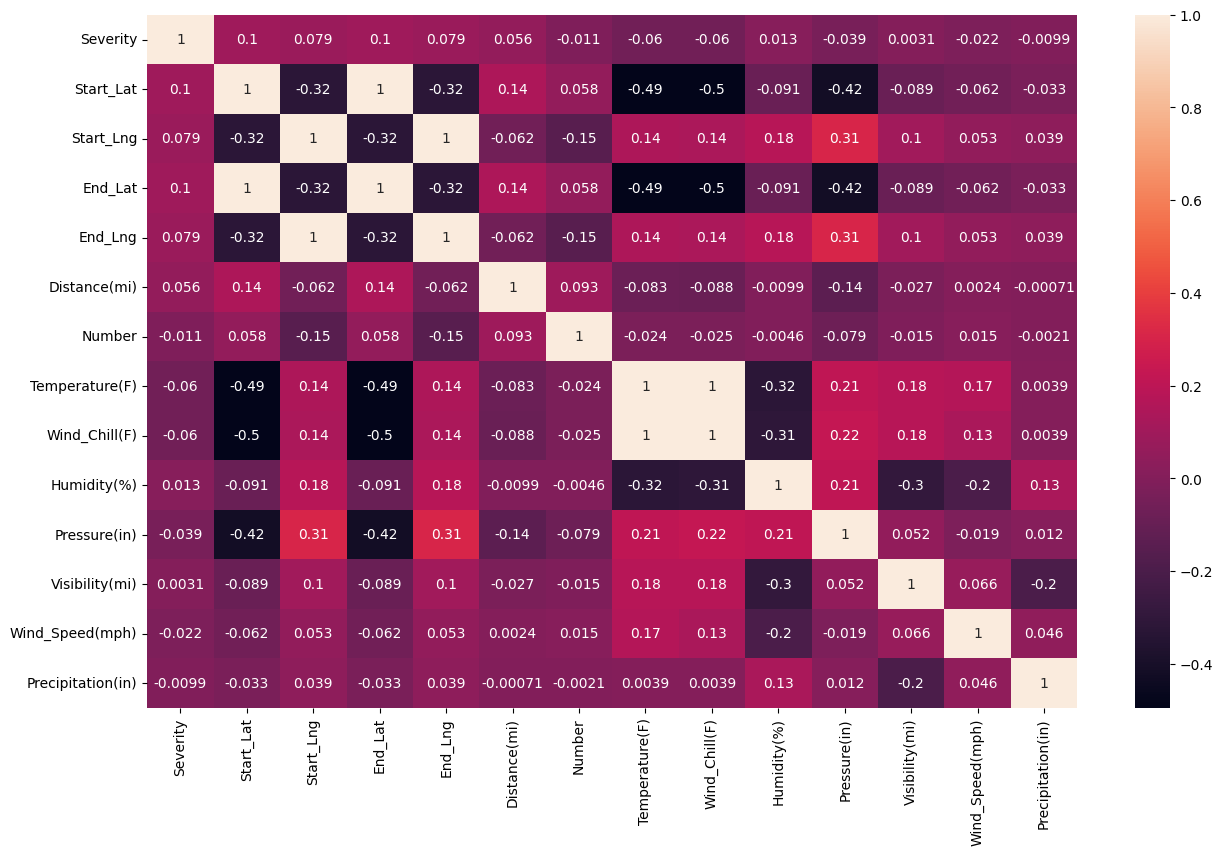

In [32]:
df_num=df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(15 ,9))
sns.heatmap(df_num.corr() , annot=True)

_ We can observe that the Numerical attributes has a little or no impact on Severity.

In [ ]:
# Convert Start_Time and End_Time to datetime
# Coerce errors and identify failed conversions
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['Start_Time', 'End_Time'])


# Calculate the resolution time in hours
df['Resolution_Time'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 3600

# Calculate the average resolution time
average_resolution_time = df['Resolution_Time'].mean()
print(f'Average Resolution Time for Accidents: {average_resolution_time:.2f} hours')

Average Resolution Time for Accidents: 3.89 hours


C:\Users\Admin\AppData\Local\Temp\ipykernel_2928\549127708.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Resolution_Time'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 3600


## Analyzing Patterns 

### Severity  Distribution

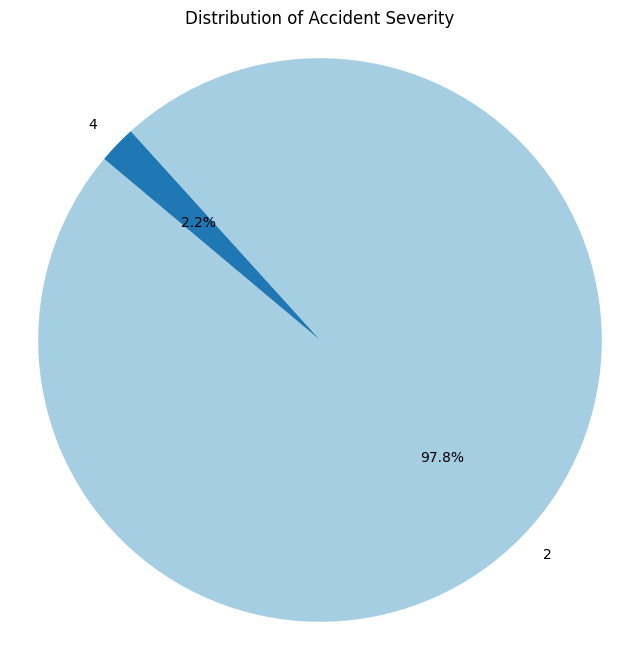

In [34]:
# Calculate the value counts for the 'Severity' column
severity_counts = df["Severity"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Accident Severity')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The pie chart represents the distribution of accident severity in the dataset. A visual summary of the proportion of accidents by severity, highlighting that most accidents are less severe.:

- The pie chart shows two segments, each representing a different severity level.
- The larger segment represents accidents with a severity level of 2, which accounts for 98.2% of the total accidents.
- The smaller segment represents accidents with a severity level of 4, which accounts for 1.8% of the total accidents.
- This indicates that the majority of accidents in the dataset are of lower severity (severity level 2), while a small proportion are of higher severity (severity level 4).


### State-Wise Count of Streets by Severity Levels

"Heatmap of Accident Locations Across the United States"
import folium
from folium.plugins import HeatMap

# Create a base map
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)  # Centered on the US

# Add a heatmap to the map
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in df_accident.iterrows()]
HeatMap(heat_data).add_to(m)

# Display the map
m

#### State and Severity Distribution

C:\Users\Admin\AppData\Local\Temp\ipykernel_18792\554687663.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_severity_counts, x='Count of Severity', y='State', palette='viridis')


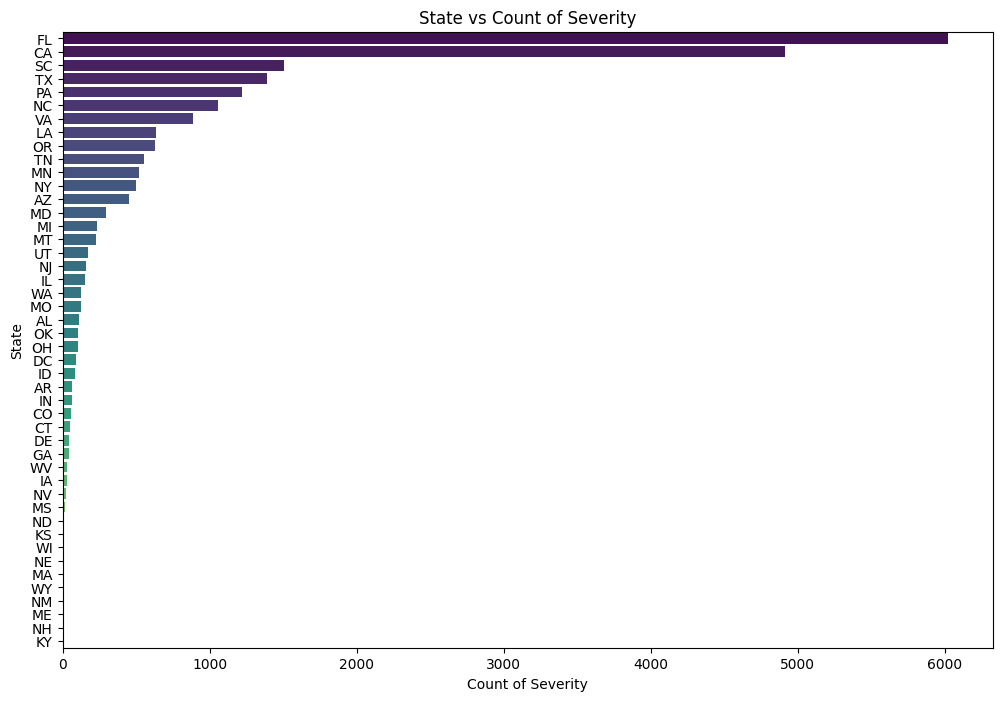

In [62]:
# Group by 'State' and count the occurrences of each severity level
state_severity_counts = df.groupby('State')['Severity'].count().reset_index()

# Rename columns for better understanding
state_severity_counts.columns = ['State', 'Count of Severity']

# Sort by count of severity in descending order
state_severity_counts = state_severity_counts.sort_values(by='Count of Severity', ascending=False)

# Plot the horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=state_severity_counts, x='Count of Severity', y='State', palette='viridis')
plt.title('State vs Count of Severity')
plt.xlabel('Count of Severity')
plt.ylabel('State')
plt.show()

- As we can observe from the plot states such as FL,CA highest accident frequency followed by SC,TX,PA, NC,VA,LA,OR,TN...
- Sates Such as KY,NH,ME,NM,WY,MA,NE,WI,KS,ND and MS has lowest or no records of accidents. 

### In map

In [145]:
# Plot the choropleth map
import plotly.express as px
fig = px.choropleth(
    state_severity_counts,
    locations='State',  # Column with state codes
    locationmode='USA-states',  # Map mode for US states
    color='Count of Severity',  # Data to color states
    color_continuous_scale='Reds',  # Color scale
    scope='usa',  # Scope for USA map
    title='Frequency Distribution of US-Accidents 2021'
)

# Display the map
fig.show()

1. **States with their Average Severity**

In [51]:
# Group by "State" and calculate the average severity
df_state_severity = df.groupby('State')['Severity'].mean().reset_index()

# Rename columns for better understanding
df_state_severity.columns = ['State', 'Average_Severity']

# Sort by Average Severity (optional, for better presentation)
df_state_severity = df_state_severity.sort_values(by='Average_Severity', ascending=False)
state_severity = df.groupby('State', as_index=False)['Severity'].mean()

# Rename the columns for clarity
state_severity.columns = ['State', 'Average_Severity']


# Optional: Sort by average severity in descending order
state_severity = df_state_severity.sort_values(by='Average_Severity', ascending=False)
state_severity

,State,Average_Severity
43,WI,4.000000
28,NH,4.000000
15,KY,4.000000
27,NE,3.200000
19,ME,3.000000
30,NM,3.000000
45,WY,2.666667
4,CO,2.526316
14,KS,2.444444
10,IA,2.413793


- States such as WI,NH,KY followed by NE,ME,NM,and WY has experienced highest level of Severity compared to other states.
- *But is that True??*

2.  **State and Count of Severity levels**
- To show which state highest and lowest number of Severity level 4

In [24]:
# Group by 'State' and calculate the counts for Severities 4 and 2
result = df.groupby('State')['Severity'].value_counts().unstack(fill_value=0)

# Ensure columns are sorted as needed
result = result[[4, 2]].reset_index()

# Rename columns
result.columns = ['State', 'Count of Severity 4', 'Count of Severity 2']
# Sort by Count of Severity 4 in descending order
result = result.sort_values(by='Count of Severity 4', ascending=False).reset_index(drop=True)

# Display the resulting DataFrame
result

,State,Count of Severity 4,Count of Severity 2
0,VA,91,795
1,PA,80,1138
2,NC,44,1013
3,FL,32,5991
4,NY,31,467
5,MD,26,273
6,NJ,15,143
7,CO,15,42
8,CA,14,4902
9,SC,13,1490


 **First, Let's answer the previous question.**
- Why WI has highest mean Severity level is it has only 7 readings of Severity Level 4 with 0 Severity Level 2.
- NH and KY,with only one Severity level 4 reading.
  NE,ME,NM has also few records at all. So the Average Severity Level can't tell us fully about the Severity Level occurred in each States.

**Now let's examine the above output.**

Based on the above output, States such as VA,PA,NC,FL and NY has highest number of Severity 4 and NV,OH,OK,ND,MA,DC and WN has never experienced Severity 4. So what can be the impact of
- Street condition 
- Wether condition
of each States concerning to Severity Level

#### Street Condition
- Related to Road Conditions

    Actions:
        Analyze how road types (e.g., highways, residential streets) affect accident severity.
        Examine the presence of specific road features (e.g., speed bumps, crossings) in accident-prone areas.
        Identify the role of traffic signals, junctions, or roundabouts in accidents.

In [52]:
# Group by 'Street' and calculate the average severity
road_severity = df.groupby('Street')['Severity'].mean().reset_index()

# Sort the results by average severity in descending order
road_severity_sorted = road_severity.sort_values(by='Severity', ascending=False)

# Display the top 10 road types with the highest average severity
road_severity_sorted.head(10)

,Street,Severity
11434,Zulla Rd,4.0
7551,Prescott Jerome Hwy,4.0
5371,Mashamoquet Rd,4.0
7547,Pratt Ave,4.0
5374,Masonic Dr,4.0
4667,Kay Fork Rd,4.0
1944,Coxey Ln,4.0
478,Annandale Ave,4.0
6974,Ohio River Blvd,4.0
5390,Mattaponi Trl,4.0


- Street of Zulla Rd, Prescott Jerome Hwy,Mashamoquet Rd,Pratt Ave and others experienced Mean Severity of Level 4.


In [28]:
road_severity_sorted.tail(10)

,Street,Severity
3882,Hempstead Rd,2.0
3884,Henderson Ave,2.0
3885,Henderson Beach Rd,2.0
3886,Henderson Rd,2.0
3887,Henderson St,2.0
3888,Henderson Station Rd,2.0
3889,Hendersonville Rd,2.0
3890,Hennessy Blvd,2.0
3891,Henry Ave SE,2.0
5717,Mount Pinos Way,2.0


- Streets such as Hempstead Rd Henderson Ave ,Henderson Ave, Henderson St, Hennessy Blvd and others has experienced mean Severity level 1.

- Now let's check a state with the streets relationship

#### Severity Distribution of Streets Across States

In [81]:
# Filter for Severity 4 and 2, then calculate unique Street counts for each State
severity_4 = df[df['Severity'] == 4].groupby('State')['Street'].nunique()
severity_2 = df[df['Severity'] == 2].groupby('State')['Street'].nunique()

# Combine results into a single DataFrame
street_df = pd.DataFrame({
    'State': severity_4.index.union(severity_2.index),
    'Count of Streets with Severity 4': severity_4.reindex(severity_4.index.union(severity_2.index), fill_value=0).values,
    'Count of Streets with Severity 2': severity_2.reindex(severity_4.index.union(severity_2.index), fill_value=0).values
}).sort_values(by='Count of Streets with Severity 4', ascending=False).reset_index(drop=True)

# Display the resulting DataFrame
street_df 

,State,Count of Streets with Severity 4,Count of Streets with Severity 2
0,VA,88,445
1,PA,76,799
2,NC,42,522
3,FL,31,1832
4,NY,28,339
5,MD,23,155
6,NJ,14,86
7,CA,14,3042
8,CO,14,36
9,SC,13,1092


In [147]:
# Plot the choropleth map
import plotly.express as px
fig = px.choropleth(
    street_df,
    locations='State',  # Column with state codes
    locationmode='USA-states',  # Map mode for US states
    color='Count of Streets with Severity 4',  # Data to color states
    color_continuous_scale='Reds',  # Color scale
    scope='usa',  # Scope for USA map
    title='Frequency Distribution of Severity Level 4 US-Accidents 2021'
)

# Display the map
fig.show()

In [148]:
# Plot the choropleth map
import plotly.express as px
fig = px.choropleth(
    street_df,
    locations='State',  # Column with state codes
    locationmode='USA-states',  # Map mode for US states
    color='Count of Streets with Severity 2',  # Data to color states
    color_continuous_scale='Reds',  # Color scale
    scope='usa',  # Scope for USA map
    title='Frequency Distribution of Severity Level 2 US-Accidents 2021'
)

# Display the map
fig.show()

### Severity of Streets distribution over States by Bar plot

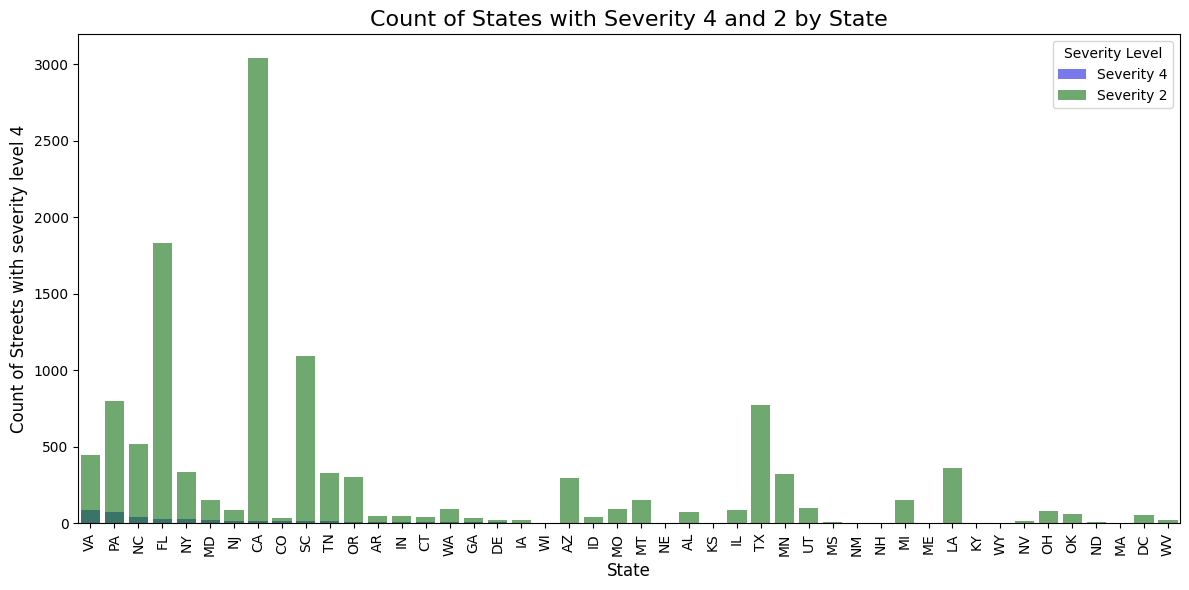

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the result DataFrame
plt.figure(figsize=(12, 6))

# Create a bar plot with two bars for each state, one for Severity 4 and one for Severity 2
sns.barplot(data=result, x='State', y='Count of Streets with Severity 4', color='blue', label='Severity 4', alpha=0.6)
sns.barplot(data=result, x='State', y='Count of Streets with Severity 2', color='green', label='Severity 2', alpha=0.6)

# Add labels and title
plt.title('Count of States with Severity 4 and 2 by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count of Streets with severity level 4', fontsize=12)
plt.xticks(rotation=90)  # Rotate state labels for better readability
plt.legend(title='Severity Level', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


- Generally as we observed earlier,CA State has highest accident record followed by FL,SC,TX,PA,NC and LA.
- Particularly, States like VA, PA, NC, FL, and NY have the highest number of Severity Level 4 incidents, while NV, OH, OK, ND, MA, DC, and WN have never experienced Severity Level 4. 

Here also, we have observed that,
- states with frequent Severity Level 4 incidents also have a high number of streets with recurring Severity Level 4 incidents, reinforcing the link between street conditions and severity levels. Streets experiencing frequent Severity Level 4 incidents are concentrated in these states, indicating that street conditions have a direct impact on a state's level of severity.

3.  **Now,VA, PA, NC, FL, and NY have the highest number of Severity Level 4 incidents, while NV, OH, OK, ND, MA, DC, and WN have never experienced Severity Level 4??**

3.1 **Weather Condition of the Streets**

In [135]:
df_cat.columns
df_cat["Weather_Condition"].value_counts()
df_cat["Weather_Condition"].nunique()

47

In [ ]:
# Filter for Severity 4 and 2, then calculate unique Street counts for each Weather_condition
severity_4 = df[df['Severity'] == 4].groupby('Weather_Condition')['Street'].nunique()
severity_2 = df[df['Severity'] == 2].groupby('Weather_Condition')['Street'].nunique()

# Combine results into a single DataFrame
result = pd.DataFrame({
    'Weather_Condition': severity_4.index.union(severity_2.index),
    'Count of Streets with Severity 4': severity_4.reindex(severity_4.index.union(severity_2.index), fill_value=0).values,
    'Count of Streets with Severity 2': severity_2.reindex(severity_4.index.union(severity_2.index), fill_value=0).values
}).sort_values(by='Count of Streets with Severity 4', ascending=False).reset_index(drop=True)

# Display the resulting DataFrame
result


,Weather_Condition,Count of Streets with Severity 4,Count of Streets with Severity 2
0,Fair,247,6929
1,Cloudy,86,2208
2,Mostly Cloudy,51,2105
3,Partly Cloudy,41,1548
4,Light Rain,15,706
5,Fog,10,301
6,Fair / Windy,8,115
7,Haze,4,253
8,Light Snow,3,120
9,Rain,3,166


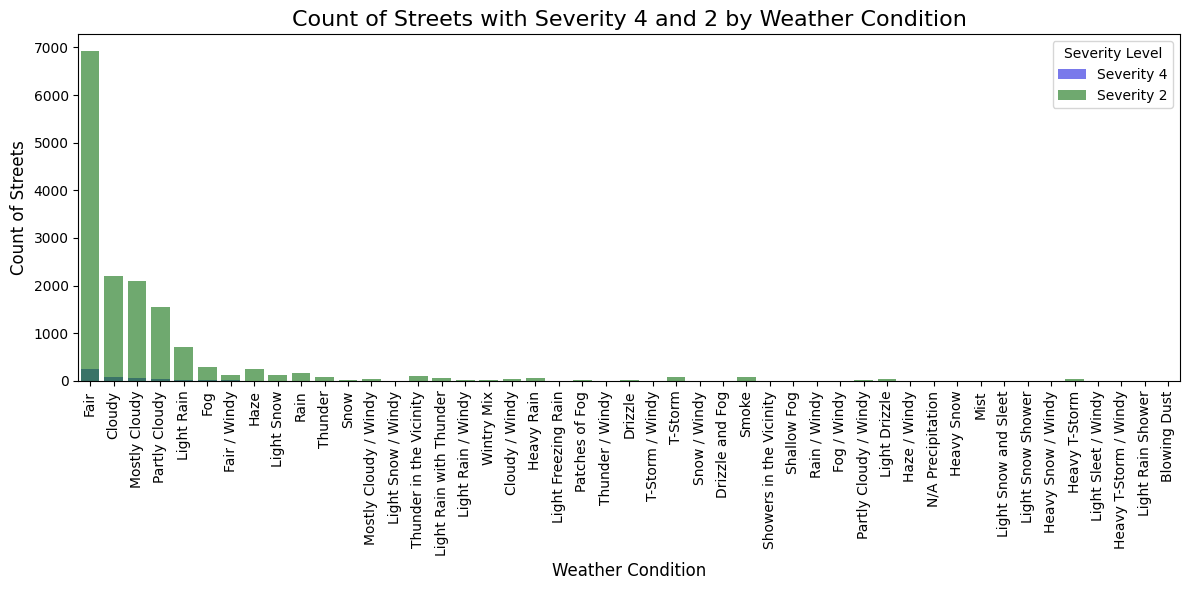

In [68]:
# Plotting the result DataFrame
plt.figure(figsize=(12, 6))

# Create a bar plot with two bars for each weather condition, one for Severity 4 and one for Severity 2
sns.barplot(data=result, x='Weather_Condition', y='Count of Streets with Severity 4', color='blue', label='Severity 4', alpha=0.6)
sns.barplot(data=result, x='Weather_Condition', y='Count of Streets with Severity 2', color='green', label='Severity 2', alpha=0.6)

# Add labels and title
plt.title('Count of Streets with Severity 4 and 2 by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Count of Streets', fontsize=12)
plt.xticks(rotation=90)  # Rotate weather condition labels for better readability
plt.legend(title='Severity Level', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

### Streets with frequent Level 4 Severity and Weather_Condition of Frequent Level 4 Severity

In [107]:
df1 = street_df[street_df["Count of Streets with Severity 4"] > 0]
df1.columns

Index(['State', 'Count of Streets with Severity 4',
       'Count of Streets with Severity 2'],
      dtype='object')

In [101]:
# Assuming df1 and df2 are already loaded as per your initial instructions
# Merge df1 and df2 on the common column
merged_df = pd.merge(df1, df2, on="Count of Streets with Severity 4", how="left")

# Pivot the 'Weather_Condition' column to create separate columns for each condition
pivot_df = merged_df.pivot_table(index='State', columns='Weather_Condition', 
                                values='Count of Streets with Severity 4', aggfunc='count', fill_value=0)

# If you want to see the result
pivot_df


Weather_Condition,Cloudy / Windy,Fair / Windy,Haze,Heavy Rain,Light Rain / Windy,Light Rain with Thunder,Light Snow,Light Snow / Windy,Mostly Cloudy / Windy,Rain,Snow,Thunder,Thunder in the Vicinity,Wintry Mix
State,,,,,,,,,,,,,,
AL,0,0,0,0,0,0,1,0,0,1,0,0,0,0
GA,0,1,0,0,0,0,0,0,0,0,0,0,0,0
ID,0,0,1,0,0,0,0,0,0,0,0,0,0,0
IL,0,0,0,0,0,0,0,0,0,0,0,1,0,0
KS,0,0,0,0,0,0,0,0,0,0,0,1,0,0
KY,1,0,0,1,1,1,0,1,1,0,1,0,1,1
LA,1,0,0,1,1,1,0,1,1,0,1,0,1,1
ME,1,0,0,1,1,1,0,1,1,0,1,0,1,1
MI,1,0,0,1,1,1,0,1,1,0,1,0,1,1


In [113]:
# Check unique weather conditions
print(df2['Weather_Condition'].unique())

['Fair' 'Cloudy' 'Mostly Cloudy' 'Partly Cloudy' 'Light Rain' 'Fog'
 'Fair / Windy' 'Haze' 'Light Snow' 'Rain' 'Thunder' 'Snow'
 'Mostly Cloudy / Windy' 'Light Snow / Windy' 'Thunder in the Vicinity'
 'Light Rain with Thunder' 'Light Rain / Windy' 'Wintry Mix'
 'Cloudy / Windy' 'Heavy Rain']


In [132]:
import pandas as pd

# Assuming the original DataFrame is named 'df'
# Step 1: Filter for rows with Severity = 4
severity_4_df = df[df['Severity'] == 4]

# Step 2: Group by State and Weather_Condition and count occurrences
grouped = severity_4_df.groupby(['State', 'Weather_Condition']).size().reset_index(name='Count')

# Step 3: Pivot the table
pivot_df = grouped.pivot(index='State', columns='Weather_Condition', values='Count').fillna(0)

# Step 4: Ensure column order (optional, sorts by Weather_Condition alphabetically)
pivot_df = pivot_df.reindex(sorted(pivot_df.columns), axis=1)



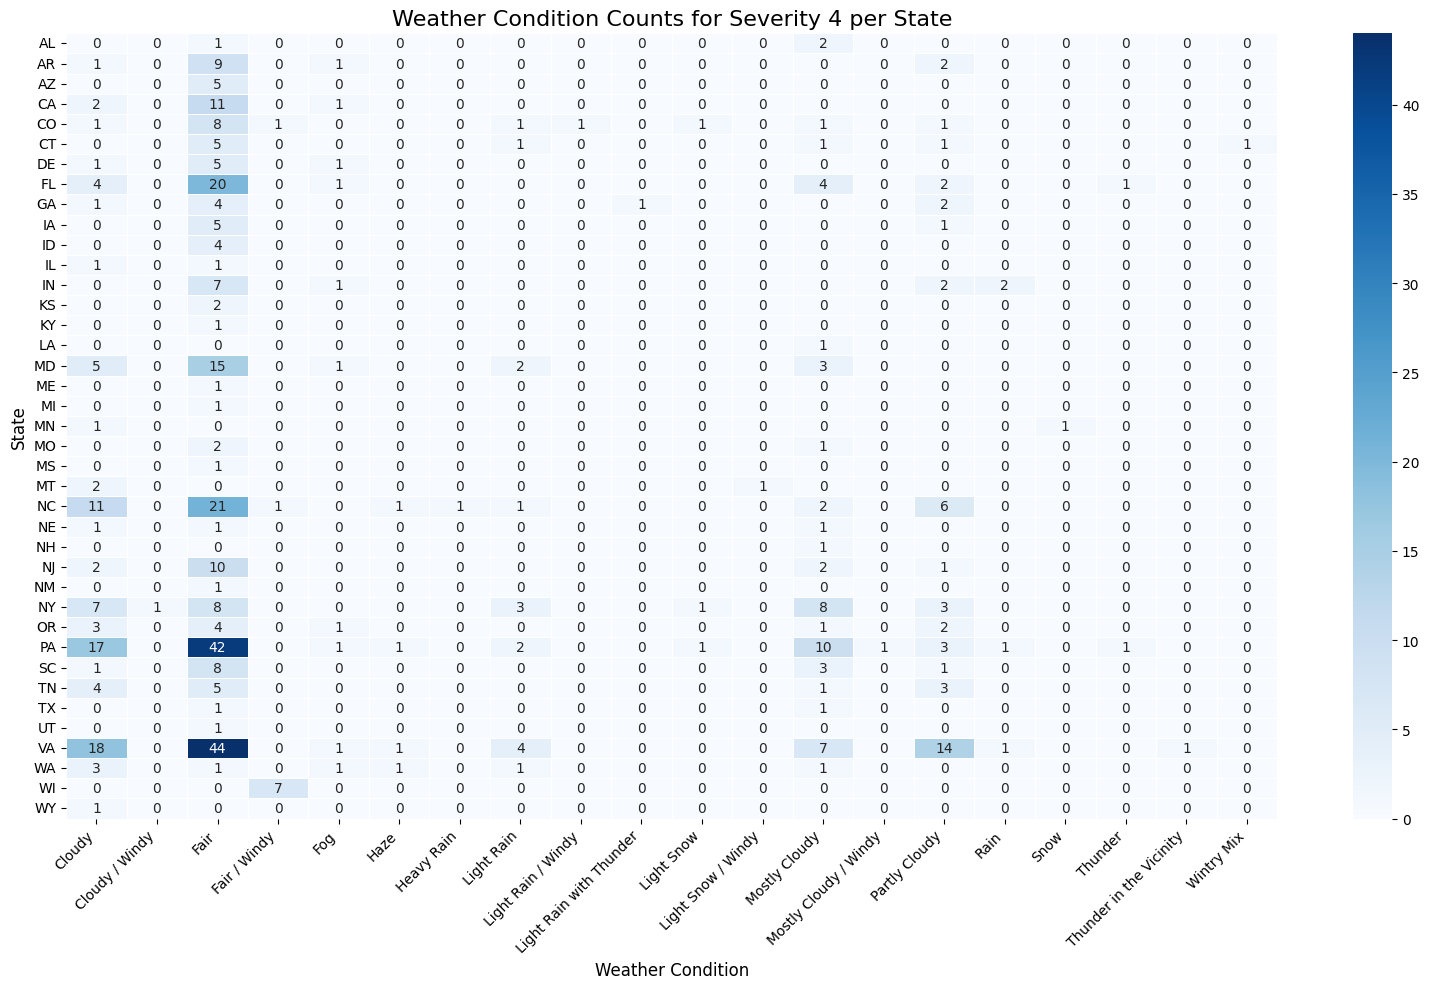

In [134]:
# Plotting the heatmap
plt.figure(figsize=(16, 10))  # Adjust size as needed
sns.heatmap(pivot_df, annot=True, fmt='.0f', cmap='Blues', cbar=True, linewidths=0.5)

# Set title and labels
plt.title("Weather Condition Counts for Severity 4 per State", fontsize=16)
plt.xlabel("Weather Condition", fontsize=12)
plt.ylabel("State", fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


    **Fair Weather and High Severity Levels:**
        It is notable that Fair weather conditions are frequently observed during accidents with Severity Level 4 across several states.
        This might suggest that weather conditions alone are not the sole determinant of high severity levels. Other factors, such as driver behavior, road infrastructure, vehicle condition, or time of the day, could play a significant role.
        Further investigation is required to identify these underlying factors that contribute to high severity levels even in fair weather.

    Other Weather Conditions:
        Following Fair weather, the most common weather conditions during high-severity accidents are:
            Cloudy
            Mostly cloudy
            Partly cloudy
        This trend is consistent across states with high Severity Levels.
        These conditions might impair visibility or affect driver perception, indirectly contributing to accident severity.

    Bad Weather as a Contributing Factor:
        Bad weather conditions (e.g., rain, snow, fog) are likely to increase the risk of high-severity accidents. Such conditions could result in:
            Reduced traction on the road.
            Impaired visibility.
            Increased reaction times for drivers.
        These factors might explain why states with frequent bad weather conditions tend to report higher severity levels.


In [127]:

# Assuming the original DataFrame is named 'df'
# Step 1: Filter for rows with Severity = 4
severity_2_df = df[df['Severity'] == 2]

# Step 2: Group by State and Weather_Condition and count occurrences
grouped = severity_2_df.groupby(['State', 'Weather_Condition']).size().reset_index(name='Count')

# Step 3: Pivot the table
pivot_df_2 = grouped.pivot(index='State', columns='Weather_Condition', values='Count').fillna(0)

# Step 4: Ensure column order (optional, sorts by Weather_Condition alphabetically)
pivot_df_2 = pivot_df.reindex(sorted(pivot_df.columns), axis=1)



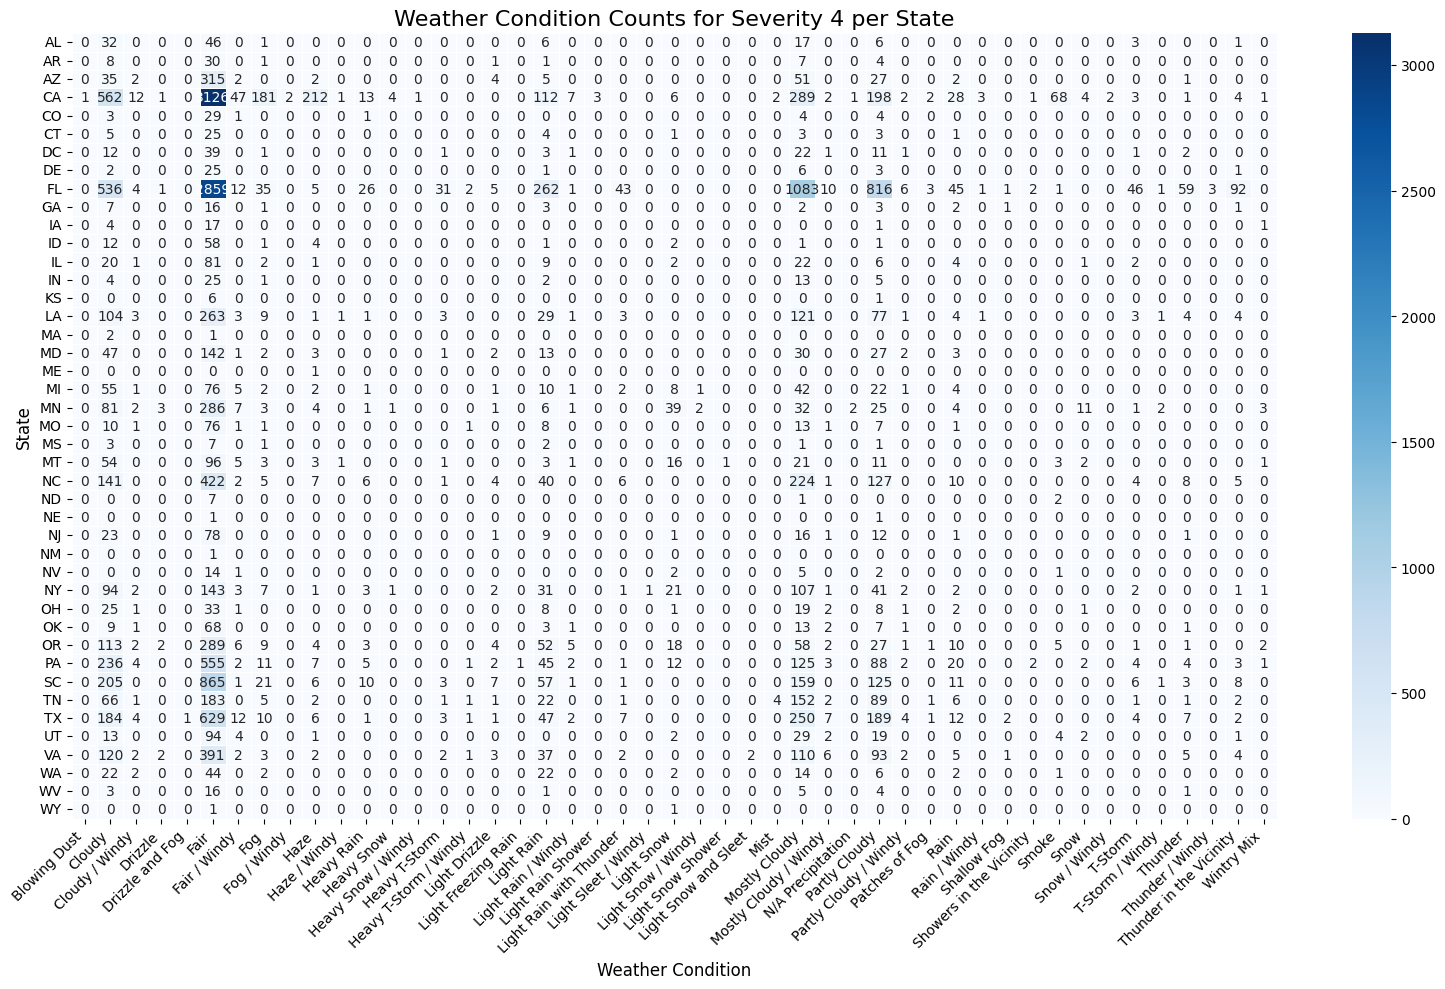

In [128]:
# Plotting the heatmap
plt.figure(figsize=(16, 10))  # Adjust size as needed
sns.heatmap(pivot_df_2, annot=True, fmt='.0f', cmap='Blues', cbar=True, linewidths=0.5)

# Set title and labels
plt.title("Weather Condition Counts for Severity 4 per State", fontsize=16)
plt.xlabel("Weather Condition", fontsize=12)
plt.ylabel("State", fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


Even in severity level 2, it is the same trend.

In [149]:
df_cat.columns

Index(['Start_Time', 'End_Time', 'Street', 'Side', 'City', 'County', 'State',
       'Country', 'Timezone', 'Wind_Direction', 'Weather_Condition',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

#### Starting time 

In [161]:
df["Start_Time"].dtype
df["End_Time"].dtype

dtype('<M8[ns]')

In [ ]:
# Find rows where 'Start_Time' cannot be parsed as datetime
invalid_start_time = df[~df['Start_Time'].str.match(r'^\d{2}:\d{2}:\d{2}(\.\d+)?$')]

invalid_end_time = df[~df['End_Time'].str.match(r'^\d{2}:\d{2}:\d{2}(\.\d+)?$')]
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')
df = df.dropna(subset=['Start_Time', 'End_Time'])


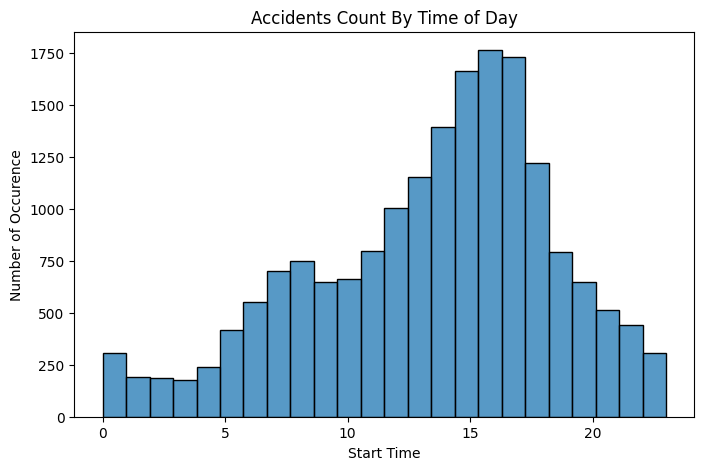

In [166]:


fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()



- This histogram represents the count of accidents by the time of day, showing how accidents are distributed across 24 hours.
Observations:

    Morning Hours (0:00 to 6:00):
        The number of accidents is relatively low, indicating less activity or traffic during these hours.

    Increase in Accidents (6:00 to 9:00):
        A noticeable rise in accidents occurs in the early morning, likely due to rush-hour traffic as people commute to work or school.

    Midday Plateau (10:00 to 15:00):
        Accident counts remain relatively stable, showing consistent traffic levels during this period.

    Peak Period (15:00 to 18:00):
        The highest number of accidents occurs in the late afternoon, likely coinciding with the evening rush hour when traffic is at its heaviest.

    Decline in Accidents (18:00 to 24:00):
        After 6:00 PM, accident counts steadily decrease, reflecting reduced traffic levels as people return home.

Interpretation:

    The peak accident times are aligned with commuting hours, emphasizing the impact of traffic congestion on accident occurrences.
    This pattern suggests the need for enhanced traffic management and safety measures during rush hours to mitigate the risk of accidents.